## Sarthak Jain, Precog tasks

## Captcha Task

# Task 0

## Creating the EASY Set

In [ ]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont
from zipfile import ZipFile

# Paths and Settings
output_dir = "easy_set"
images_dir = os.path.join(output_dir, "images")
num_images = 500
image_size = (200, 60)
font_size = 72

# Create directories
os.makedirs(images_dir, exist_ok=True)

# Load font
try:
    font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf"
    font = ImageFont.truetype(font_path, size=font_size)
except:
    font = ImageFont.load_default()

# Random word generator
def random_word(length=10):
    return ''.join(random.choices(string.ascii_uppercase + string.ascii_lowercase, k=length))

# Generate images
data = []
used_words = set()

while len(data) < num_images:
    word = random_word(random.randint(5, 10))
    if word in used_words:
        continue
    used_words.add(word)

    img = Image.new('RGB', image_size, color='white')
    draw = ImageDraw.Draw(img)

    # Calculate text position using textbbox
    bbox = draw.textbbox((0, 0), word, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    x = (image_size[0] - text_width) // 2
    y = (image_size[1] - text_height) // 2

    draw.text((x, y), word, font=font, fill='black')

    # Draw border
    draw.rectangle([0, 0, image_size[0] - 1, image_size[1] - 1], outline='black', width=2)

    # Save
    filename = f"{word}.png"
    filepath = os.path.join(images_dir, filename)
    img.save(filepath)

    data.append((filename, word))

# Zip it
zip_path = "easy_set.zip"
with ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            full_path = os.path.join(root, file)
            arcname = os.path.relpath(full_path, output_dir)
            zipf.write(full_path, arcname=arcname)

print("Easy set created")


Easy set created


## Sample Easy Set img


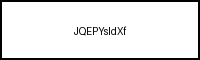

In [ ]:
from IPython.display import Image, display

display(Image(filename="/content/easy_set/images/JQEPYsIdXf.png"))


## Creating Hard Set

In [ ]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
from zipfile import ZipFile

# Configs
output_dir = "hard_set"
images_dir = os.path.join(output_dir, "images")
num_images = 500
image_size = (200, 60)
font_size_range = (28, 38)

os.makedirs(images_dir, exist_ok=True)

# Use several Google Colab-safe fonts
fonts = [
    "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf"
]

# Fallback to default if none exist
fonts = [f for f in fonts if os.path.exists(f)]
if not fonts:
    raise Exception("No fonts found!")

def random_word(length=10):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def fluctuate_capitalization(word):
    return ''.join(
        c.upper() if random.random() > 0.5 else c.lower()
        for c in word
    )

def add_noise(image):
    np_img = np.array(image).astype(np.float32)
    noise = np.random.normal(loc=0, scale=25, size=np_img.shape)
    noisy_img = np.clip(np_img + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_img)

data = []
used_words = set()

for i in range(num_images):
    word = random_word(random.randint(5, 9))
    if word in used_words:
        continue
    used_words.add(word)

    # Capitalization
    display_word = fluctuate_capitalization(word)

    # Background color: randomly white or black
    bg_color = random.choice(["white", "black"])
    text_color = random.choice(["blue", "red", "purple", "green", "orange"])

    # Font and size
    font_path = random.choice(fonts)
    font_size = random.randint(*font_size_range)
    font = ImageFont.truetype(font_path, size=font_size)

    # Create image and draw
    img = Image.new('RGB', image_size, color=bg_color)
    draw = ImageDraw.Draw(img)

    # Centering
    bbox = draw.textbbox((0, 0), display_word, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]
    x = (image_size[0] - text_width) // 2
    y = (image_size[1] - text_height) // 2

    draw.text((x, y), display_word, font=font, fill=text_color)

    # Apply noise
    img = add_noise(img)

    # Save image
    filename = f"{word}.png"
    img.save(os.path.join(images_dir, filename))
    data.append((filename, word))

# Zip
zip_path = "hard_set.zip"
with ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            full_path = os.path.join(root, file)
            arcname = os.path.relpath(full_path, output_dir)
            zipf.write(full_path, arcname=arcname)

print("Hard Set created")


Hard Set created


## Sample Hard Set img


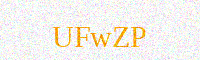

In [ ]:
from IPython.display import Image, display

display(Image(filename="/content/hard_set/images/ufwzp.png"))


## Creating Bonus Set (type 1)

In [ ]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from zipfile import ZipFile

# Settings
output_dir = "bonus_set2"
images_dir = os.path.join(output_dir, "images")
os.makedirs(images_dir, exist_ok=True)

image_size = (200, 64)
font_size_range = (30, 40)
num_images = 500

fonts = [
    "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    "/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
    "/usr/share/fonts/truetype/freefont/FreeSans.ttf"
]
fonts = [f for f in fonts if os.path.exists(f)]

# Generate random word
def random_word(length=10):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

# Random capitalization
def fluctuate_capitalization(word):
    return ''.join(c.upper() if random.random() > 0.5 else c.lower() for c in word)

# Add salt-and-pepper noise
def add_noise(image, amount=0.02):
    np_img = np.array(image)
    row, col, ch = np_img.shape
    num_salt = np.ceil(amount * np_img.size * 0.5).astype(int)
    num_pepper = np.ceil(amount * np_img.size * 0.5).astype(int)

    # Salt
    coords = [np.random.randint(0, i - 1, num_salt) for i in np_img.shape[:2]]
    np_img[coords[0], coords[1], :] = 255

    # Pepper
    coords = [np.random.randint(0, i - 1, num_pepper) for i in np_img.shape[:2]]
    np_img[coords[0], coords[1], :] = 0

    return Image.fromarray(np_img)

# Generate images
used_words = set()

for i in range(num_images):
    word = random_word(random.randint(5, 10))
    if word in used_words:
        continue
    used_words.add(word)

    is_red_bg = random.choice([True, False])
    bg_color = (255, 0, 0) if is_red_bg else (0, 255, 0)
    text_color = (0, 0, 0)

    img = Image.new('RGB', image_size, bg_color)
    draw = ImageDraw.Draw(img)

    render_word = word[::-1] if is_red_bg else word  # reversed for red background
    display_word = fluctuate_capitalization(render_word)  # Apply random caps

    font_path = random.choice(fonts)
    font_size = random.randint(*font_size_range)
    try:
        font = ImageFont.truetype(font_path, font_size)
    except:
        font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), display_word, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    text_x = (image_size[0] - text_width) // 2
    text_y = (image_size[1] - text_height) // 2

    draw.text((text_x, text_y), display_word, font=font, fill=text_color)

    img = add_noise(img, amount=0.08)

    # Save with the original (forward) word as the filename
    img.save(os.path.join(images_dir, f"{word}.png"))

# Zip the folder
with ZipFile("bonus_set2.zip", 'w') as zipf:
    for root, dirs, files in os.walk(images_dir):
        for file in files:
            filepath = os.path.join(root, file)
            zipf.write(filepath, os.path.relpath(filepath, images_dir))

print("Bonus set generated.")


Bonus set generated.


## Creating Bonus Set (type 2)

In [ ]:
import os
import random
import string
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import numpy as np
from zipfile import ZipFile

# Setup
output_dir = "bonus_set"
images_dir = os.path.join(output_dir, "images")
os.makedirs(images_dir, exist_ok=True)

# Settings
num_images = 500
image_size = (200, 64)
font_size_range = (30, 40)
fonts = [
    "/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf",
    "/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf",
    "/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf",
    "/usr/share/fonts/truetype/freefont/FreeSans.ttf"
]
fonts = [f for f in fonts if os.path.exists(f)]

# Helpers
def random_word(length=10):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

def fluctuate_capitalization(word):
    return ''.join(c.upper() if random.random() > 0.5 else c.lower() for c in word)

def add_noise(image):
    np_image = np.array(image)
    noise = np.random.randint(0, 50, (image.size[1], image.size[0], 3), dtype='uint8')
    noisy_image = np.clip(np_image + noise, 0, 255).astype('uint8')
    return Image.fromarray(noisy_image)

# Generation
used_words = set()
for i in range(num_images):
    word = random_word(random.randint(5, 10))
    if word in used_words:
        continue
    used_words.add(word)

    # Background
    is_red_bg = random.choice([True, False])
    bg_color = (255, 0, 0) if is_red_bg else (0, 255, 0)
    text_color = (0, 0, 0)

    img = Image.new('RGB', image_size, color=bg_color)
    draw = ImageDraw.Draw(img)

    # Font and text
    font_path = random.choice(fonts)
    font_size = random.randint(*font_size_range)
    try:
        font = ImageFont.truetype(font_path, font_size)
    except:
        font = ImageFont.load_default()

    # Determine rendering word
    render_word = word[::-1] if is_red_bg else word
    display_word = fluctuate_capitalization(render_word)

    # Center text
    bbox = draw.textbbox((0, 0), display_word, font=font)
    text_width, text_height = bbox[2] - bbox[0], bbox[3] - bbox[1]
    text_x = (image_size[0] - text_width) // 2
    text_y = (image_size[1] - text_height) // 2
    draw.text((text_x, text_y), display_word, font=font, fill=text_color)

    # Add noise
    img = add_noise(img)

    # Save image with original word
    filename = f"{word}.png"
    img.save(os.path.join(images_dir, filename))

# Zip the dataset
zip_path = "bonus_set.zip"
with ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk(output_dir):
        for file in files:
            full_path = os.path.join(root, file)
            arcname = os.path.relpath(full_path, output_dir)
            zipf.write(full_path, arcname=arcname)

print("Bonus set created")


Bonus set created


## Sample Bonus set images  of both types

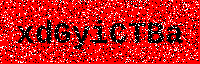

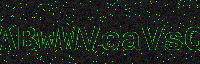

In [ ]:
from IPython.display import Image, display

display(Image(filename="/content/bonus_set2/images/abtciygdx.png"))
print("")
display(Image(filename="/content/bonus_set/images/abwwvcavsg.png"))

## Create a combined Easy and Hard Set

In [ ]:
import os
import shutil

# Define source folders
easy_set_path = '/content/easy_set/images'
hard_set_path = '/content/hard_set/images'

combined_set_path = '/content/combined_set/images'

os.makedirs(combined_set_path, exist_ok=True)

# Function to copy all files from a folder to the destination
def copy_images(src_folder, dst_folder):
    for filename in os.listdir(src_folder):
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(dst_folder, filename)
        if os.path.isfile(src_path):  # Ensure it's a file
            shutil.copy2(src_path, dst_path)

# Copy from both sets
copy_images(easy_set_path, combined_set_path)
copy_images(hard_set_path, combined_set_path)

print("Images copied successfully.")


Images copied successfully.


# -------------------------------------------------------------------------
# Task 1

## Training


In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np


In [ ]:
import string

# Define character set
CHARS = string.ascii_lowercase + string.digits
CHAR2IDX = {c: i + 1 for i, c in enumerate(CHARS)}
IDX2CHAR = {i + 1: c for i, c in enumerate(CHARS)}
BLANK_LABEL = 0  # CTC blank


In [ ]:
class CaptchaOCRDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.samples = [
            (os.path.join(image_dir, f), os.path.splitext(f)[0].lower())
            for f in os.listdir(image_dir)
            if f.endswith(".png") or f.endswith(".jpg")
        ]

    def encode_label(self, label):
        return [CHAR2IDX[c] for c in label if c in CHAR2IDX]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label_text = self.samples[idx]
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        label_encoded = torch.tensor(self.encode_label(label_text), dtype=torch.long)
        return image, label_encoded, len(label_encoded)


In [ ]:
transform = transforms.Compose([
    transforms.Resize((50, 200)),
    transforms.ToTensor()
])


In [ ]:
def ocr_collate_fn(batch):
    images, labels, label_lengths = zip(*batch)
    images = torch.stack(images)
    label_concat = torch.cat(labels)
    label_lengths = torch.tensor(label_lengths, dtype=torch.long)
    input_lengths = torch.full(size=(len(images),), fill_value=50, dtype=torch.long)  # estimate time steps
    return images, label_concat, input_lengths, label_lengths


In [ ]:
class OCRModel(nn.Module):
    def __init__(self, num_classes=len(CHAR2IDX) + 1):  # +1 for blank
        super(OCRModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2)
        )
        self.lstm = nn.LSTM(input_size=128 * 12, hidden_size=256, bidirectional=True, num_layers=2, batch_first=True)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.cnn(x)  # (B, C, H, W) → (B, 128, 12, 50)
        x = x.permute(0, 3, 1, 2)  # (B, W, C, H)
        x = x.flatten(2)  # (B, W, C*H)
        x, _ = self.lstm(x)
        x = self.fc(x)  # (B, W, num_classes)
        x = x.log_softmax(2)
        return x


In [ ]:
from torch.optim import Adam
from torch.nn import CTCLoss

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OCRModel().to(device)
criterion = CTCLoss(blank=BLANK_LABEL, zero_infinity=True)
optimizer = Adam(model.parameters(), lr=1e-3)

dataset = CaptchaOCRDataset("/content/combined_set/images", transform)
loader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=ocr_collate_fn)

for epoch in range(150):
    model.train()
    total_loss = 0
    for images, labels, input_lengths, label_lengths in loader:
        images, labels = images.to(device), labels.to(device)
        logits = model(images)  # (B, W, C)
        logits = logits.permute(1, 0, 2)  # CTC expects (T, N, C)

        loss = criterion(logits, labels, input_lengths, label_lengths)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")


Epoch 1, Loss: 274.5483
Epoch 2, Loss: 225.5736
Epoch 3, Loss: 225.2792
Epoch 4, Loss: 225.1812
Epoch 5, Loss: 225.4097
Epoch 6, Loss: 224.9459
Epoch 7, Loss: 224.8257
Epoch 8, Loss: 224.9268
Epoch 9, Loss: 224.8775
Epoch 10, Loss: 224.6951
Epoch 11, Loss: 224.7688
Epoch 12, Loss: 224.7087
Epoch 13, Loss: 225.0357
Epoch 14, Loss: 224.4443
Epoch 15, Loss: 224.4018
Epoch 16, Loss: 224.3892
Epoch 17, Loss: 223.9480
Epoch 18, Loss: 223.9487
Epoch 19, Loss: 223.9472
Epoch 20, Loss: 223.7746
Epoch 21, Loss: 223.6454
Epoch 22, Loss: 223.4577
Epoch 23, Loss: 223.1443
Epoch 24, Loss: 222.9612
Epoch 25, Loss: 222.8516
Epoch 26, Loss: 222.2655
Epoch 27, Loss: 222.0514
Epoch 28, Loss: 221.7822
Epoch 29, Loss: 221.0469
Epoch 30, Loss: 220.5633
Epoch 31, Loss: 220.3746
Epoch 32, Loss: 220.2244
Epoch 33, Loss: 220.0735
Epoch 34, Loss: 219.7428
Epoch 35, Loss: 219.6508
Epoch 36, Loss: 219.6311
Epoch 37, Loss: 219.2385
Epoch 38, Loss: 219.3322
Epoch 39, Loss: 219.1234
Epoch 40, Loss: 218.8379
Epoch 41,

In [ ]:
# Save only the model's state dict (recommended way)
torch.save(model.state_dict(), "captcha_ocr_model_interation10.pth")
print("Model weights saved to captcha_ocr_model_interation10.pth")


Model weights saved to captcha_ocr_model_interation10.pth


In [ ]:
def greedy_decode(logits):
    preds = logits.argmax(2)  # (B, T)
    results = []
    for pred in preds:
        prev = BLANK_LABEL
        text = ""
        for p in pred:
            p = p.item()
            if p != prev and p != BLANK_LABEL:
                text += IDX2CHAR.get(p, "")
            prev = p
        results.append(text)
    return results


In [ ]:
test_dataset = CaptchaOCRDataset("/content/combined_set/images", transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=ocr_collate_fn)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_ocr_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels, input_lengths, label_lengths in dataloader:
            images = images.to(device)
            logits = model(images)  # (B, T, C)
            logits = logits.permute(1, 0, 2)  # (T, B, C)

            decoded_preds = greedy_decode(logits.permute(1, 0, 2))  # back to (B, T, C)

            # Get true labels from original dataset filenames
            start = 0
            for i in range(len(label_lengths)):
                true_label_ids = labels[start:start+label_lengths[i]].tolist()
                true_label = ''.join(IDX2CHAR[c] for c in true_label_ids)
                start += label_lengths[i]

                all_preds.append(decoded_preds[i])
                all_labels.append(true_label)

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='micro')
    print(f"Test Accuracy: {acc*100:.2f}%")
    print(f"F1 Score : {f1:.4f}")


In [ ]:
evaluate_ocr_model(model, test_loader)


Test Accuracy: 71.80%
F1 Score : 0.7180


# -------------------------------------------------------------------------

# Task 2: Generation

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np

# --- Constants ---
CHARS = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
CHAR2IDX = {char: idx + 1 for idx, char in enumerate(CHARS)}  # CTC requires 0 as blank
IDX2CHAR = {idx: char for char, idx in CHAR2IDX.items()}
BLANK = 0  # CTC blank

# --- Utility Functions ---
def text_to_labels(text):
    return [CHAR2IDX[c] for c in text if c in CHAR2IDX]

def labels_to_text(labels):
    return ''.join([IDX2CHAR[i] for i in labels if i != BLANK])

# --- Dataset ---
class CaptchaDataset(Dataset):
    def __init__(self, image_dir, is_train=True, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.all_images = os.listdir(image_dir)
        train_imgs, test_imgs = train_test_split(self.all_images, test_size=0.2, random_state=42)
        self.images = train_imgs if is_train else test_imgs

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        filename = self.images[idx]
        label = filename.split('.')[0]
        image = Image.open(os.path.join(self.image_dir, filename)).convert('L')
        if self.transform:
            image = self.transform(image)
        label_tensor = torch.tensor(text_to_labels(label), dtype=torch.long)
        return image, label_tensor, label

# --- Collate Function ---
def collate_fn(batch):
    images, labels, raw_labels = zip(*batch)
    images = torch.stack(images)
    label_lengths = torch.tensor([len(label) for label in labels], dtype=torch.long)
    labels = torch.cat(labels)
    return images, labels, label_lengths, raw_labels

import torch
import torch.nn as nn
import torchvision.models as models

class CRNN(nn.Module):
    def __init__(self, num_classes):
        super(CRNN, self).__init__()

        # CNN backbone
        m = models.resnet18(pretrained=False)
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),  # 1 channel (grayscale)
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # 64x32x128
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2),  # 128x16x64
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d((2, 1), (2, 1)),  # 256x8x64
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.MaxPool2d((2, 1), (2, 1)),  # 512x4x64
        )

        # Recurrent layers (Bidirectional LSTM)
        self.rnn = nn.LSTM(
            input_size=512, hidden_size=256,
            num_layers=2, bidirectional=True
        )

        # Final FC (for num_classes + 1 blank)
        self.fc = nn.Linear(512, num_classes + 1)  # +1 for CTC blank token

    def forward(self, x):
      # x: [B, 1, 64, 256]
      x = self.cnn(x)           # [B, 512, 4, W]

      # Use AdaptiveAvgPool to force height to 1
      x = nn.functional.adaptive_avg_pool2d(x, (1, x.size(3)))  # -> [B, 512, 1, W]

      x = x.squeeze(2)          # [B, 512, W]
      x = x.permute(2, 0, 1)    # [W, B, 512] for RNN

      x, _ = self.rnn(x)        # [W, B, 512]
      x = self.fc(x)            # [W, B, num_classes+1]
      return x


# --- Training & Evaluation ---
def train(model, dataloader, epochs=10):
    criterion = nn.CTCLoss(blank=BLANK, zero_infinity=True)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    model.train()

    for epoch in range(epochs):
        total_loss = 0
        for images, labels, label_lengths, _ in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            label_lengths = label_lengths.to(device)
            preds = model(images)  # [W, B, C]
            input_lengths = torch.full(size=(preds.size(1),), fill_value=preds.size(0), dtype=torch.long).to(device)
            loss = criterion(preds.log_softmax(2), labels, input_lengths, label_lengths)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(dataloader):.4f}")

def evaluate(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels, label_lengths, raw_labels in dataloader:
            images = images.to(device)
            preds = model(images)
            preds = preds.log_softmax(2)
            pred_labels = preds.argmax(2).permute(1, 0)  # [B, W]

            for i in range(len(pred_labels)):
                raw_pred = pred_labels[i].cpu().numpy().tolist()

                # CTC decoding: remove consecutive duplicates and blanks
                decoded = []
                for j in range(len(raw_pred)):
                    if j == 0 or raw_pred[j] != raw_pred[j - 1]:
                        if raw_pred[j] != BLANK:
                            decoded.append(raw_pred[j])
                pred_text = labels_to_text(decoded)

                # Print actual vs predicted
                #print(f"GT: {raw_labels[i]} | Pred: {pred_text}")

                # Accuracy tracking
                total += 1
                if pred_text == raw_labels[i]:
                    correct += 1

    acc = correct / total if total > 0 else 0
    print(f"\nTest Accuracy: {acc * 100:.2f}%")

# --- Prepare Data ---
transform = transforms.Compose([
    transforms.Resize((64, 256)),
    transforms.ToTensor()
])

train_ds = CaptchaDataset('/content/combined_set/images', is_train=True, transform=transform)
test_ds = CaptchaDataset('/content/combined_set/images', is_train=False, transform=transform)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dl = DataLoader(test_ds, batch_size=1, shuffle=False, collate_fn=collate_fn)

# --- Run ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CRNN(num_classes=len(CHARS)).to(device)

train(model, train_dl, epochs=100)


Epoch [1/100], Loss: 6.7924
Epoch [2/100], Loss: 4.1388
Epoch [3/100], Loss: 4.1177
Epoch [4/100], Loss: 4.1109
Epoch [5/100], Loss: 4.0863
Epoch [6/100], Loss: 4.0091
Epoch [7/100], Loss: 3.9383
Epoch [8/100], Loss: 3.9252
Epoch [9/100], Loss: 3.9130
Epoch [10/100], Loss: 3.9063
Epoch [11/100], Loss: 3.9068
Epoch [12/100], Loss: 3.8991
Epoch [13/100], Loss: 3.8926
Epoch [14/100], Loss: 3.8761
Epoch [15/100], Loss: 3.8763
Epoch [16/100], Loss: 3.8694
Epoch [17/100], Loss: 3.8643
Epoch [18/100], Loss: 3.8393
Epoch [19/100], Loss: 3.7982
Epoch [20/100], Loss: 3.7683
Epoch [21/100], Loss: 3.7451
Epoch [22/100], Loss: 3.7191
Epoch [23/100], Loss: 3.6900
Epoch [24/100], Loss: 3.6412
Epoch [25/100], Loss: 3.5948
Epoch [26/100], Loss: 3.5656
Epoch [27/100], Loss: 3.4991
Epoch [28/100], Loss: 3.3944
Epoch [29/100], Loss: 3.3435
Epoch [30/100], Loss: 3.2607
Epoch [31/100], Loss: 3.1770
Epoch [32/100], Loss: 3.1305
Epoch [33/100], Loss: 3.0509
Epoch [34/100], Loss: 2.9660
Epoch [35/100], Loss: 2

In [ ]:
evaluate(model, test_dl)


Test Accuracy: 53.50%


## Task 3 Bonus

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import string
from torch.optim import Adam
from torch.nn import CTCLoss
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# ---- Character Encoding ----
CHARS = string.ascii_lowercase + string.digits
CHAR2IDX = {c: i + 1 for i, c in enumerate(CHARS)}
IDX2CHAR = {i + 1: c for i, c in enumerate(CHARS)}
BLANK_LABEL = 0

# ---- Dataset for Bonus Task ----
class CaptchaOCRDataset(Dataset):
    def __init__(self, image_dir, transform=None, reverse_prob=0.5, training=True):
        self.image_dir = image_dir
        self.transform = transform
        self.training = training
        self.reverse_prob = reverse_prob
        self.samples = [
            (os.path.join(image_dir, f), os.path.splitext(f)[0].lower())
            for f in os.listdir(image_dir)
            if f.endswith(".png") or f.endswith(".jpg")
        ]

    def encode_label(self, label):
        return [CHAR2IDX[c] for c in label if c in CHAR2IDX]

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        image_path, label_text = self.samples[idx]
        image = Image.open(image_path).convert("L")
        if self.transform:
            image = self.transform(image)
        if self.training and np.random.rand() < self.reverse_prob:
            label_text = label_text[::-1]
        label_encoded = torch.tensor(self.encode_label(label_text), dtype=torch.long)
        return image, label_encoded, len(label_encoded), label_text

# ---- Image Transform ----
transform = transforms.Compose([
    transforms.Resize((50, 200)),
    transforms.ToTensor()
])

# ---- Collate Function ----
def ocr_collate_fn(batch):
    images, labels, label_lengths, raw_labels = zip(*batch)
    images = torch.stack(images)
    label_concat = torch.cat(labels)
    label_lengths = torch.tensor(label_lengths, dtype=torch.long)
    input_lengths = torch.full(size=(len(images),), fill_value=50, dtype=torch.long)
    return images, label_concat, input_lengths, label_lengths, raw_labels


#---- CRNN Model ----
class OCRModel(nn.Module):
    def __init__(self, num_classes=len(CHAR2IDX) + 1):
        super(OCRModel, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2, 2)
        )
        self.lstm = nn.LSTM(input_size=128 * 12, hidden_size=256, bidirectional=True, num_layers=2, batch_first=True)
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.cnn(x)  # (B, C, H, W) → (B, 128, 12, 50)
        x = x.permute(0, 3, 1, 2)  # (B, W, C, H)
        x = x.flatten(2)  # (B, W, C*H)
        x, _ = self.lstm(x)
        x = self.fc(x)
        return x.log_softmax(2)

# ---- Setup ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = OCRModel().to(device)
criterion = CTCLoss(blank=BLANK_LABEL, zero_infinity=True)
optimizer = Adam(model.parameters(), lr=1e-3)

train_dataset = CaptchaOCRDataset("/content/bonus_set/images", transform, training=True)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=ocr_collate_fn)

test_dataset = CaptchaOCRDataset("/content/bonus_set/images", transform, training=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=ocr_collate_fn)

# ---- Training Loop ----
for epoch in range(300):
    model.train()
    total_loss = 0
    for images, labels, input_lengths, label_lengths, _ in train_loader:
        images, labels = images.to(device), labels.to(device)
        logits = model(images)
        logits = logits.permute(1, 0, 2)
        loss = criterion(logits, labels, input_lengths, label_lengths)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

# ---- Save Model ----
torch.save(model.state_dict(), "captcha_ocr_bonus_model.pth")
print("Model saved to captcha_ocr_bonus_model.pth")

# ---- Greedy Decoder ----
def greedy_decode(logits):
    preds = logits.argmax(2)
    results = []
    for pred in preds:
        prev = BLANK_LABEL
        text = ""
        for p in pred:
            p = p.item()
            if p != prev and p != BLANK_LABEL:
                text += IDX2CHAR.get(p, "")
            prev = p
        results.append(text)
    return results



Epoch 1, Loss: 167.0560
Epoch 2, Loss: 114.5286
Epoch 3, Loss: 114.4179
Epoch 4, Loss: 114.4384
Epoch 5, Loss: 114.4701
Epoch 6, Loss: 114.1605
Epoch 7, Loss: 114.2493
Epoch 8, Loss: 114.3134
Epoch 9, Loss: 114.1604
Epoch 10, Loss: 114.3470
Epoch 11, Loss: 114.2884
Epoch 12, Loss: 114.1245
Epoch 13, Loss: 114.1329
Epoch 14, Loss: 114.3553
Epoch 15, Loss: 114.3275
Epoch 16, Loss: 114.2032
Epoch 17, Loss: 114.0180
Epoch 18, Loss: 113.4058
Epoch 19, Loss: 113.2065
Epoch 20, Loss: 113.4347
Epoch 21, Loss: 112.9351
Epoch 22, Loss: 112.8027
Epoch 23, Loss: 112.6191
Epoch 24, Loss: 112.5380
Epoch 25, Loss: 112.4000
Epoch 26, Loss: 112.1002
Epoch 27, Loss: 111.9626
Epoch 28, Loss: 111.7007
Epoch 29, Loss: 111.5296
Epoch 30, Loss: 111.2309
Epoch 31, Loss: 110.9216
Epoch 32, Loss: 110.9277
Epoch 33, Loss: 110.4567
Epoch 34, Loss: 110.2574
Epoch 35, Loss: 110.0549
Epoch 36, Loss: 109.6448
Epoch 37, Loss: 109.2973
Epoch 38, Loss: 108.3756
Epoch 39, Loss: 107.9217
Epoch 40, Loss: 107.4433
Epoch 41,

In [ ]:
# ---- Evaluation ----
def evaluate_ocr_model(model, dataloader):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels, input_lengths, label_lengths, raw_labels in dataloader:
            images = images.to(device)
            logits = model(images).permute(1, 0, 2)
            decoded_preds = greedy_decode(logits.permute(1, 0, 2))
            all_preds.extend(decoded_preds)
            all_labels.extend(raw_labels)

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='micro')
    print(f"Test Accuracy: {acc * 100:.2f}%")
    print(f"F1 Score: {f1:.4f}")

evaluate_ocr_model(model, test_loader)



In [ ]:
def show_predictions(model, dataset, n=5):
    model.eval()
    fig, axs = plt.subplots(n, 1, figsize=(6, 1.8 * n))

    for i in range(n):
        image, _, _, true_text = dataset[i]
        input_image = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_image).permute(1, 0, 2)
            pred_text = greedy_decode(output.permute(1, 0, 2))[0]

        axs[i].imshow(image.squeeze(0), cmap="gray")
        axs[i].axis("off")
        axs[i].set_title(f"Actual: {true_text}\nPredicted: {pred_text}", fontsize=12, loc='left')

    plt.tight_layout()
    plt.show()


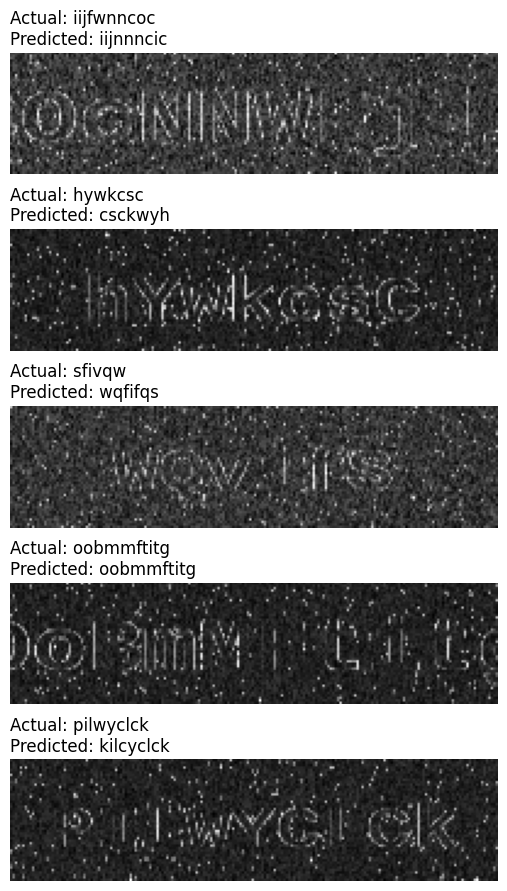

In [ ]:
show_predictions(model, test_dataset, n=5)
